# Analyzing IMDB Data in Keras

In [51]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [52]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

# print(x_train[0])
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [53]:
iline = 1
print('x_train first line:')
print('--------')
x_itrain = x_train[iline]
print(x_itrain)
print('')
print('y_train first line:')
print('--------')
y_itrain = y_train[iline]
print(y_itrain)

print('- 0 is a negative review')
print('- 1 a possitive review')

x_train first line:
--------
[1, 48, 25, 942, 72, 4, 86, 31, 16, 66, 128, 31, 168, 33, 2, 2, 2, 59, 9, 147, 384, 2, 250, 168, 33, 2, 2, 59, 9, 43, 117, 2, 2, 187, 59, 9, 164, 84, 92, 2, 41, 333, 2, 16, 2, 5, 893, 11, 86, 20, 150, 29, 9, 896, 393, 65, 9, 24, 15, 52, 5, 13, 81, 24, 391, 138, 161, 36, 97, 14, 31, 86, 12, 9, 4, 454, 2, 156, 164, 19, 65, 14, 9, 24, 2, 14, 9, 395, 86, 31, 47, 128, 156, 128, 65, 5, 94, 384, 13, 104, 15, 4, 228, 9, 128, 11, 2, 2, 300, 5, 4, 228, 9, 128, 11, 2, 2, 342, 12, 9, 24, 4, 249, 20, 13, 219, 21, 11, 2, 19, 86, 31, 94, 31, 194, 194, 194, 164]

y_train first line:
--------
0
- 0 is a negative review
- 1 a possitive review


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [54]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.
  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  1.
  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0

And we'll also one-hot encode the output.

In [55]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.
In for example x_train.shape -> (25000, 1000), the 25000 is the number if training example and the 1000 is the number of features.

In [56]:
print(x_train.shape)
print(y_train.shape)


(25000, 1000)
(25000, 2)


In [57]:
# TODO: Build the model architecture
print(x_train.shape)
print(y_train.shape)

model = Sequential()
model.add(Dense(126, activation='sigmoid', input_shape=(1000,)))
model.add(Dropout(.2))
model.add(Dense(126, activation='sigmoid'))          # Add one hidden layer
model.add(Dropout(.2))
model.add(Dense(126, activation='relu'))          # Add one hidden layer
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))          # Add one hidden layer
model.add(Dense(2, activation='softmax'))        # Add an output layer     //

# TODO: Compile the model using a loss function and an optimizer.
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss = 'mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['accuracy'])


(25000, 1000)
(25000, 2)


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [58]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
history = model.fit(x_train, y_train, validation_split=0.10, batch_size=50, epochs=16, verbose=1)
# history = model.fit(x_train, y_train, batch_size=50, epochs=16, verbose=1)

print(history.history.keys())

Train on 22500 samples, validate on 2500 samples
Epoch 1/16
22500/22500 [==============================] - 5s 238us/step - loss: 0.1581 - acc: 0.7550 - val_loss: 0.0965 - val_acc: 0.8724
Epoch 2/16
22500/22500 [==============================] - 5s 224us/step - loss: 0.1055 - acc: 0.8527 - val_loss: 0.0967 - val_acc: 0.8672
Epoch 3/16
22500/22500 [==============================] - 5s 230us/step - loss: 0.0998 - acc: 0.8636 - val_loss: 0.0970 - val_acc: 0.8672
Epoch 4/16
22500/22500 [==============================] - 5s 225us/step - loss: 0.0964 - acc: 0.8691 - val_loss: 0.0961 - val_acc: 0.8724
Epoch 5/16
22500/22500 [==============================] - 5s 226us/step - loss: 0.0943 - acc: 0.8732 - val_loss: 0.0967 - val_acc: 0.8696
Epoch 6/16
22500/22500 [==============================] - 5s 229us/step - loss: 0.0920 - acc: 0.8772 - val_loss: 0.1006 - val_acc: 0.8632
Epoch 7/16
22500/22500 [==============================] - 5s 223us/step - loss: 0.0907 - acc: 0.8782 - val_loss: 0.0990 - v

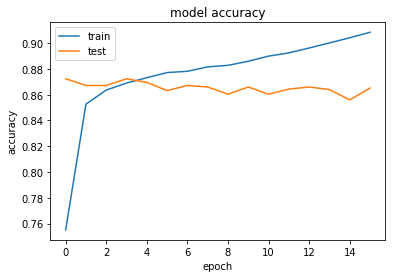

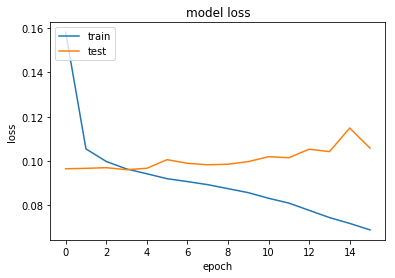

In [59]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [60]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.85388


## 7. Test the model

Test the model by entering text and predicting if it is for a favorable review. 

### a. First step, enter the review:

In [61]:
import re

movie_review = 'This is the best movie I have ever seen.  It was awesome.'

# convert to lowercase
movie_review = movie_review.lower()
words = re.sub("[^\w]", " ",  movie_review).split()
print(words)



['this', 'is', 'the', 'best', 'movie', 'i', 'have', 'ever', 'seen', 'it', 'was', 'awesome']


### b. Prepare the word to id and id to word information.

In [62]:
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
id_to_word = {value:key for key,value in word_to_id.items()}

### c. Take the word inputs and vectorise it.  
The input is the list of words save in <b>words</b>.

In [65]:
# this code is commented out, you can also load text from the training data
# words = [id_to_word[id] for id in x_itrain]


x_ireview = [[word_to_id.get(i, "?") for i in words]]

# print(x_ireview)
x_predict = np.array([np.zeros(1000)])
x_predict = tokenizer.sequences_to_matrix(x_ireview, mode='binary')
# print(x_predict)

ynew = model.predict_proba(x_predict)

print(ynew)

prednr = np.argmax(ynew)

print('')
print('Review')
print('------')
print(movie_review)

print('')
print('Classification (Possitive or negative)')
print('------')
if prednr == 0:
    print('a negative review')
else:
    print('a possitive review')
    


1/1 [==============================] - 0s 2ms/step
[[ 0.08271491  0.91728508]]

Review
------
this is the best movie i have ever seen.  it was awesome.

Classification (Possitive or negative)
------
a possitive review
